In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

# Данные

In [2]:
names1 = ['Call  Failure','Complains,Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value','Churn']
data = pd.read_csv("Customer Churn.csv")

In [12]:
cut = data[["Age","Customer Value","Status"]]
cut

,Age,Customer Value,Status
0,30,197.640,1
1,25,46.035,2
2,30,1536.520,1
3,15,240.020,1
4,15,145.805,1
...,...,...,...
3145,25,721.980,1
3146,55,261.210,1
3147,30,280.320,1
3148,30,1077.640,1


In [18]:
df=cut[:200]

# **Иерархическая кластеризация**

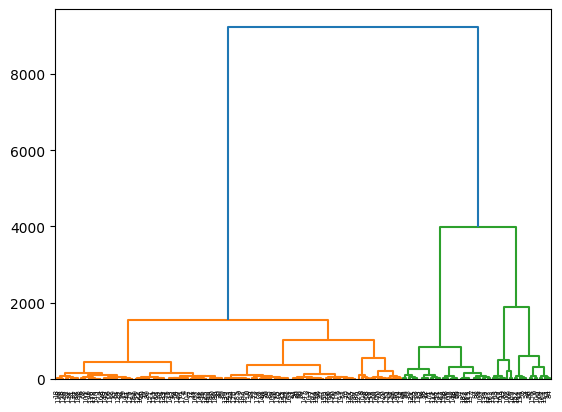

In [29]:
link = linkage(df, 'ward', 'euclidean')
dm = dendrogram(link)

Алгоритм подкрасил в дендрограмме 2 кластера.

Посмотрим какими характеристиками различаются наши кластеры.

In [ ]:
df['cluster'] = fcluster(link, 2, criterion='maxclust')

In [22]:
df.groupby('cluster').mean()

,Age,Customer Value,Status
cluster,,,
1,32.535714,175.795571,1.278571
2,27.416667,1184.099917,1.000000


Полуается, что люди возраста 27-28, имеют большую ценность, а также активны

In [23]:
df.groupby('cluster').size()

cluster
1    140
2     60
dtype: int64

Наибольшее количество людей, это люди 32-33 лет, обладающие меньшой активностью

# **Кластеризация методом k-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

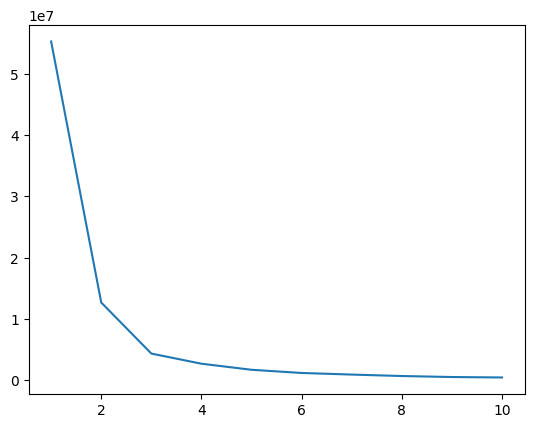

In [28]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist)
plt.show()

Два кластера - это оптимальный выбор.

In [25]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-eab4a7f8fa11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.labels_


,Age,Customer Value,Status
cluster,,,
0,27.457627,1192.702797,1.000000
1,32.482270,179.346879,1.276596


Аналогично